## Cancer Dataset Analysis Project

# Import Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_1samp

# LOAD DATASET

In [39]:
df = pd.read_csv("_cancer_dataset_uae.csv")

print("Dataset Loaded Successfully")
print(df.head())
print("\nColumns:", df.columns.tolist())

Dataset Loaded Successfully
  Patient_ID  Age  Gender Nationality        Emirate Diagnosis_Date  \
0  PAT000001   69  Female     Emirati  Umm Al Quwain     2020-11-30   
1  PAT000002   32    Male     Emirati  Umm Al Quwain     2015-10-10   
2  PAT000003   89    Male     Emirati      Abu Dhabi     2018-02-13   
3  PAT000004   78  Female     Emirati      Abu Dhabi     2022-02-04   
4  PAT000005   38  Female     Emirati       Fujairah     2019-12-03   

  Cancer_Type Cancer_Stage Treatment_Type Treatment_Start_Date  \
0       Liver           II      Radiation           2020-12-04   
1    Leukemia          III        Surgery           2015-11-05   
2       Liver          III      Radiation           2018-08-03   
3        Lung          III      Radiation           2022-03-13   
4  Pancreatic           II   Chemotherapy           2020-02-29   

                     Hospital Primary_Physician          Outcome Death_Date  \
0     Sheikh Khalifa Hospital          Dr. VO41        Recovered     

# DESCRIPTIVE STATISTICS FUNCTION

In [40]:
def descriptive_stats(sample_df, field):

    desc = sample_df[field].describe(include='all')
    mode_value = sample_df[field].mode()[0] if not sample_df[field].mode().empty else np.nan
    desc['mode'] = mode_value
    return desc


# RANDOM SAMPLING (n = 150) 

In [41]:
random_sample = df.sample(n=150, random_state=42)

random_desc = descriptive_stats(random_sample, 'Treatment_Type')
print("\n Descriptive Statistics (Random Sample of Treatment_Type)")
print(random_desc)


 Descriptive Statistics (Random Sample of Treatment_Type)
count           150
unique            4
top       Radiation
freq             41
mode      Radiation
Name: Treatment_Type, dtype: object


# SYSTEMATIC SAMPLING (every 50th record)

In [42]:
systematic_sample = df.iloc[::50, :]

systematic_desc = descriptive_stats(systematic_sample, 'Treatment_Type')
print("\n Descriptive Statistics (Systematic Sample of Treatment_Type)")
print(systematic_desc)


 Descriptive Statistics (Systematic Sample of Treatment_Type)
count         200
unique          4
top       Surgery
freq           54
mode      Surgery
Name: Treatment_Type, dtype: object


# VISUALIZATIONS (Age vs Treatment_Type)

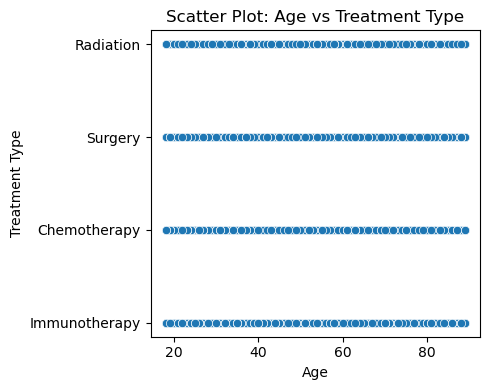

In [43]:

# Scatter Plot – Age vs Treatment
plt.figure(figsize=(5,4))
sns.scatterplot(x=df['Age'], y=df['Treatment_Type'])
plt.title("Scatter Plot: Age vs Treatment Type")
plt.xlabel("Age")
plt.ylabel("Treatment Type")
plt.tight_layout()
plt.show()


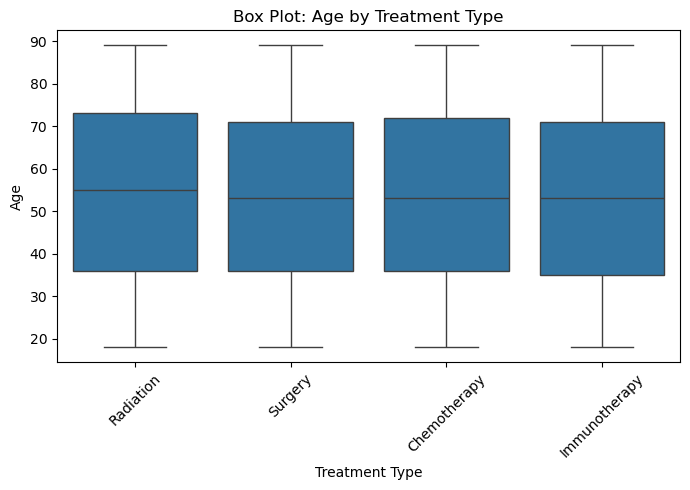

In [44]:
# Box Plot – Age grouped by Treatment Type
plt.figure(figsize=(7,5))
sns.boxplot(x=df['Treatment_Type'], y=df['Age'])
plt.title("Box Plot: Age by Treatment Type")
plt.xticks(rotation=45)
plt.xlabel("Treatment Type")
plt.ylabel("Age")
plt.tight_layout()
plt.show()

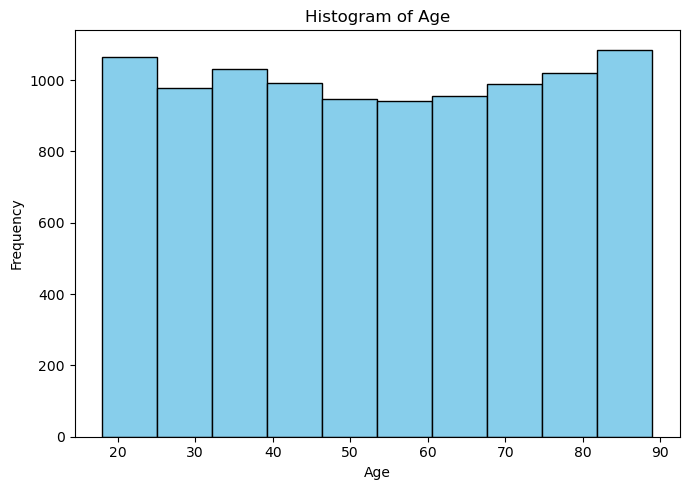

In [45]:
# Histogram – Age Distribution
plt.figure(figsize=(7,5))
plt.hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

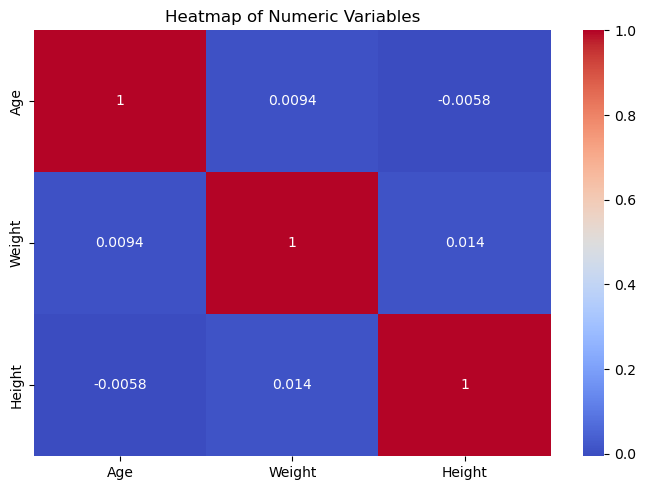

In [46]:
# Heatmap – Numeric Correlations
plt.figure(figsize=(7,5))
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap of Numeric Variables")
plt.tight_layout()
plt.show()

# HYPOTHESIS TEST (Chi-Square) 

In [47]:
print("\n--- Chi-Square Test: Treatment_Type vs Cancer_Type ---")

contingency_table = pd.crosstab(df['Treatment_Type'], df['Cancer_Type'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-Square Statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-Value:", p)

if p < 0.05:
    print(" Significant relationship between Treatment Type and Cancer Type.")
else:
    print(" No significant relationship between Treatment Type and Cancer Type.")



--- Chi-Square Test: Treatment_Type vs Cancer_Type ---
Chi-Square Statistic: 24.576649992176872
Degrees of Freedom: 21
P-Value: 0.2659647743704421
 No significant relationship between Treatment Type and Cancer Type.


# ONE-SAMPLE T-TEST

In [48]:
print("\n--- One-Sample T-Test on Treatment_Type ---")

df['Treatment_Enc'] = df['Treatment_Type'].astype('category').cat.codes
random_sample['Treatment_Enc'] = random_sample['Treatment_Type'].astype('category').cat.codes

population_mean = df['Treatment_Enc'].mean()

t_stat, p_val = ttest_1samp(random_sample['Treatment_Enc'], population_mean)

print("T-Statistic:", t_stat)
print("P-Value:", p_val)

if p_val < 0.05:
    print(" Sample is significantly different from population (NOT representative).")
else:
    print(" Sample is representative of the population.")


--- One-Sample T-Test on Treatment_Type ---
T-Statistic: 0.7168865168487873
P-Value: 0.47456636437214617
 Sample is representative of the population.


# Detailed descriptive statistics report: Treatment_Type

=== Descriptive Statistics: Treatment_Type ===
Total patients: 10000
Unique treatment categories: 4
Most frequent (mode): Radiation

Frequency table:


,count,percent
Treatment_Type,,
Radiation,2519,25.19
Surgery,2498,24.98
Immunotherapy,2497,24.97
Chemotherapy,2486,24.86


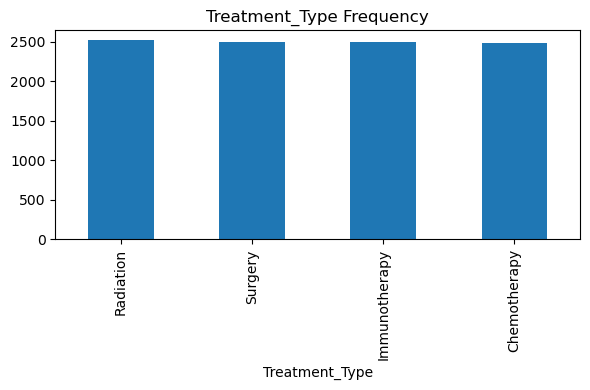

In [49]:
def treatment_report(full_df):
    col = 'Treatment_Type'
    vc = full_df[col].value_counts(dropna=False)
    pct = vc / vc.sum() * 100
    mode_ = full_df[col].mode()[0] if not full_df[col].mode().empty else np.nan
    n_unique = full_df[col].nunique(dropna=True)

    print("=== Descriptive Statistics: Treatment_Type ===")
    print(f"Total patients: {len(full_df)}")
    print(f"Unique treatment categories: {n_unique}")
    print(f"Most frequent (mode): {mode_}\n")
    print("Frequency table:")
    display(pd.DataFrame({'count': vc, 'percent': pct.round(2)}))

    plt.figure(figsize=(6,4))
    full_df[col].value_counts().plot(kind='bar')
    plt.title("Treatment_Type Frequency")
    plt.tight_layout()
    plt.show()


treatment_report(df)

# Hypothesis test between Treatment_Type & Cancer_Type

In [50]:
cont = pd.crosstab(df['Treatment_Type'], df['Cancer_Type'])
chi2, p, dof, expected = chi2_contingency(cont)

print("=== Chi-Square Test: Treatment_Type vs Cancer_Type ===")
print(f"Chi2 = {chi2:.3f}, df = {dof}, p-value = {p:.6f}")

if p < 0.05:
    print(" Significant relationship (reject H0)")
else:
    print(" No significant relationship (fail to reject H0)")

=== Chi-Square Test: Treatment_Type vs Cancer_Type ===
Chi2 = 24.577, df = 21, p-value = 0.265965
 No significant relationship (fail to reject H0)


# One-sample t-test: Representativeness of sample

In [51]:
df['Treatment_Enc'] = df['Treatment_Type'].astype('category').cat.codes
random_sample['Treatment_Enc'] = random_sample['Treatment_Type'].astype('category').cat.codes

population_mean = df['Treatment_Enc'].mean()
t_stat, p_val = ttest_1samp(random_sample['Treatment_Enc'], population_mean)

print("=== One-Sample t-Test: Sample vs Population ===")
print(f"Population Mean (encoded): {population_mean:.3f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_val:.6f}")

if p_val < 0.05:
    print(" Sample is NOT representative (significant difference).")
else:
    print(" Sample IS representative (no significant difference).")

=== One-Sample t-Test: Sample vs Population ===
Population Mean (encoded): 1.503
t-statistic: 0.717
p-value: 0.474566
 Sample IS representative (no significant difference).
